## Métricas centralidade - parte 3

- Coeficiente de agrupamento local
- Homofilia (Assortatividade)

In [1]:
# import das bibliotecas

import numpy as np
import networkx as nx

import pandas as pd

import matplotlib as mpl
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
import matplotlib.patches as mpatches

from numpy import linalg as LA

import fractions

### Instâncias

In [2]:
# binomial_tree

BTG = nx.binomial_tree(4)
# Returns the Binomial Tree of order 4.

# network
G = BTG

n = nx.number_of_nodes(G)
m = nx.number_of_edges(G)

print(f"numero de vertices: {n}")
print(f"numero de arestas: {m}")

print(f"O grafo é conexo: {nx.is_connected(G)}")

numero de vertices: 16
numero de arestas: 15
O grafo é conexo: True


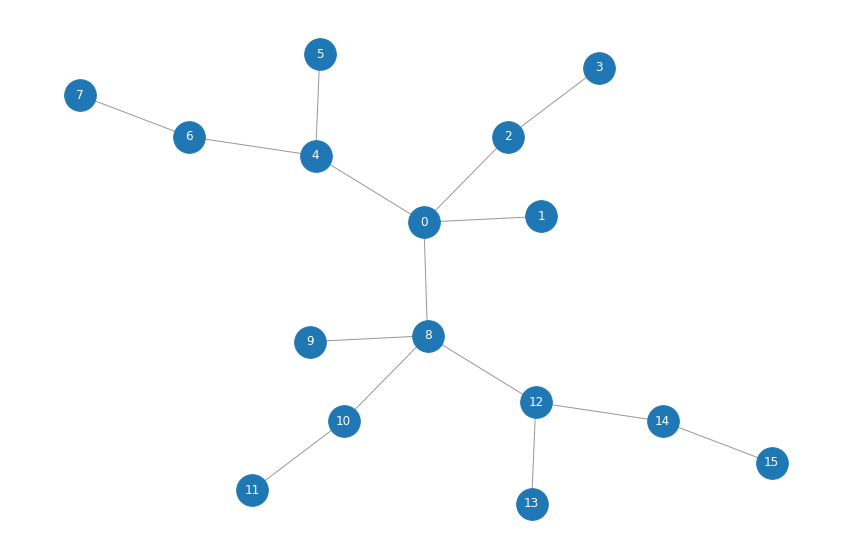

In [3]:
# grafico binomial_tree

fig, ax = plt.subplots(1,1,figsize=(15,10))

# network
G = BTG

# layout position
pos = nx.kamada_kawai_layout(G)

# draw edges
nx.draw_networkx_edges(G, 
                       pos=pos, 
                       alpha=0.4, 
                       ax=ax)

# draw nodes
nodes = nx.draw_networkx_nodes(G,
                               node_size=1000,
                               pos=pos, 
                               cmap=plt.cm.jet,
                               ax=ax)

# draw labels
nx.draw_networkx_labels(G, 
                        pos=pos, 
                        font_color='white', 
                        ax=ax)

plt.axis("off")
#plt.savefig('BTG.png', transparent=True, dpi=300)
plt.show()

In [4]:
# Zachary's Karate Club graph.

KCG = nx.karate_club_graph()

# network
G = KCG

n = nx.number_of_nodes(G)
m = nx.number_of_edges(G)

print(f"numero de vertices: {n}")
print(f"numero de arestas: {m}")

print(f"O grafo é conexo: {nx.is_connected(G)}")

numero de vertices: 34
numero de arestas: 78
O grafo é conexo: True


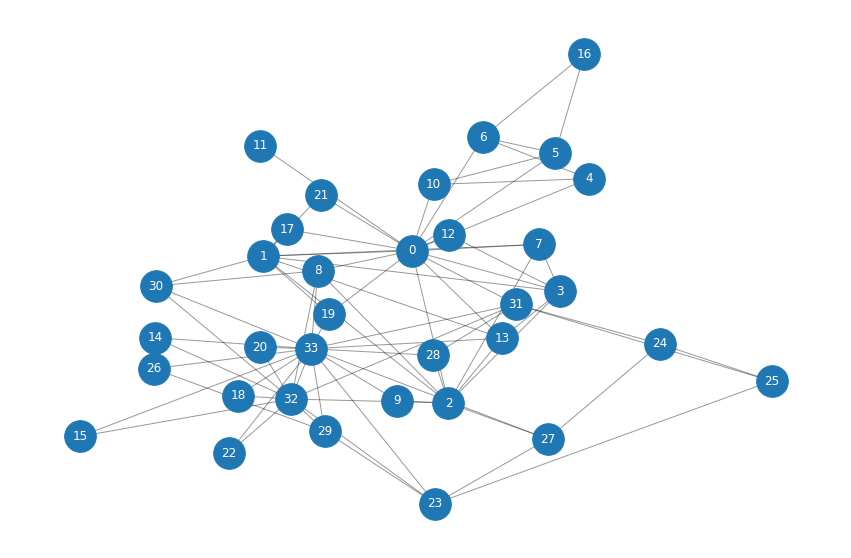

In [5]:
# grafico karate_club_graph

fig, ax = plt.subplots(1,1,figsize=(15,10))

# network
G = KCG

# layout position
pos = nx.kamada_kawai_layout(G)

# draw edges
nx.draw_networkx_edges(G, 
                       pos=pos, 
                       alpha=0.4, 
                       ax=ax)

# draw nodes
nodes = nx.draw_networkx_nodes(G,
                               node_size=1000,
                               pos=pos, 
                               cmap=plt.cm.jet,
                               ax=ax)

# draw labels
nx.draw_networkx_labels(G, 
                        pos=pos, 
                        font_color='white', 
                        ax=ax)

plt.axis("off")
#plt.savefig('BTG.png', transparent=True, dpi=300)
plt.show()

In [6]:
# Graph
# Exemplo 2.14

GND = nx.Graph()

GND.add_nodes_from([0,1,2,3,4,5])
GND.add_edges_from([(0,1),(0,2),(0,4),(1,2), (1,3), (1,4), (1,5), (2,3)])

pos = {}
pos[0] = [-1,-1]
pos[1] = [0,0]
pos[2] = [-1,1]
pos[3] = [0,1]
pos[4] = [0,-1]
pos[5] = [2,0]

# network
G = GND

n = nx.number_of_nodes(G)
m = nx.number_of_edges(G)

print(f"numero de vertices: {n}")
print(f"numero de arestas: {m}")

print(f"O grafo é conexo: {nx.is_connected(G)}")

numero de vertices: 6
numero de arestas: 8
O grafo é conexo: True


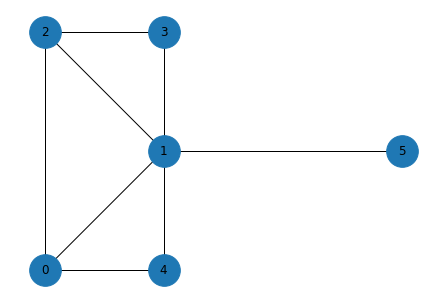

In [7]:
# gráfico Graph

nx.draw(GND, pos=pos, node_size=1000, with_labels=True)

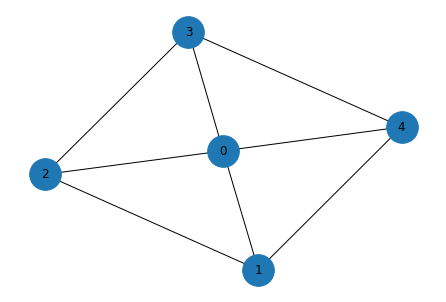

In [8]:
GCI = nx.wheel_graph(int(5))

pos = nx.circular_layout(GCI)

nx.draw(GCI, node_size=1000, with_labels=True)

In [9]:
# random_internet_as_graph

IG = nx.random_internet_as_graph(20)
# Generates a random undirected graph resembling the Internet AS network

# network
G = IG

n = nx.number_of_nodes(G)
m = nx.number_of_edges(G)

print(f"numero de vertices: {n}")
print(f"numero de arestas: {m}")

print(f"O grafo é conexo: {nx.is_connected(G)}")

numero de vertices: 20
numero de arestas: 31
O grafo é conexo: True


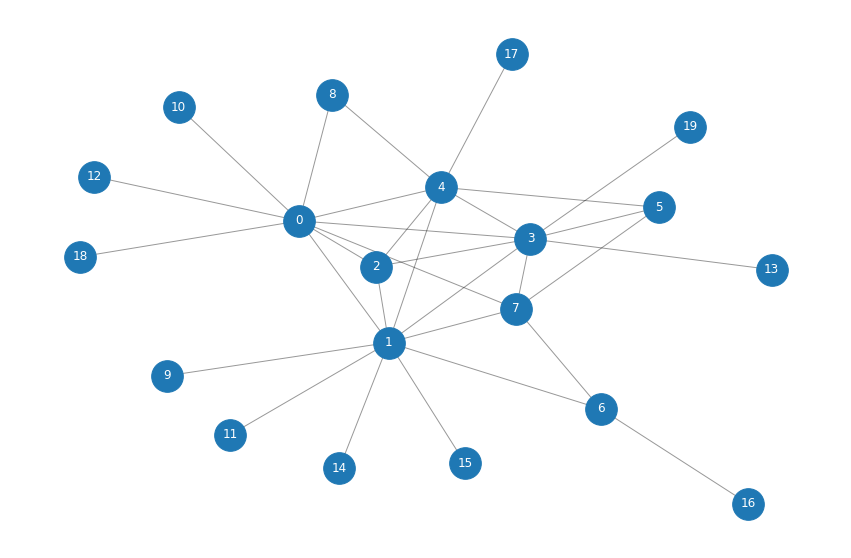

In [10]:
# gráfico random_internet_as_graph

fig, ax = plt.subplots(1,1,figsize=(15,10))

# network
G = IG

# layout position
pos = nx.kamada_kawai_layout(G)

# draw edges
nx.draw_networkx_edges(G, 
                       pos=pos, 
                       alpha=0.4, 
                       ax=ax)

# draw nodes
nodes = nx.draw_networkx_nodes(G,
                               node_size=1000,
                               pos=pos, 
                               cmap=plt.cm.jet,
                               ax=ax)

# draw labels
nx.draw_networkx_labels(G, 
                        pos=pos, 
                        font_color='white', 
                        ax=ax)

plt.axis("off")
plt.show()

In [11]:
# grafo aleatório de Erdö-Rényi com 100 nós
GER = nx.gnp_random_graph (100,0.01)
graus = dict(nx.degree(GER)).values ()

# network
G = GER

n = nx.number_of_nodes(G)
m = nx.number_of_edges(G)

print(f"numero de vertices: {n}")
print(f"numero de arestas: {m}")

print(f"O grafo é conexo: {nx.is_connected(G)}")

numero de vertices: 100
numero de arestas: 44
O grafo é conexo: False


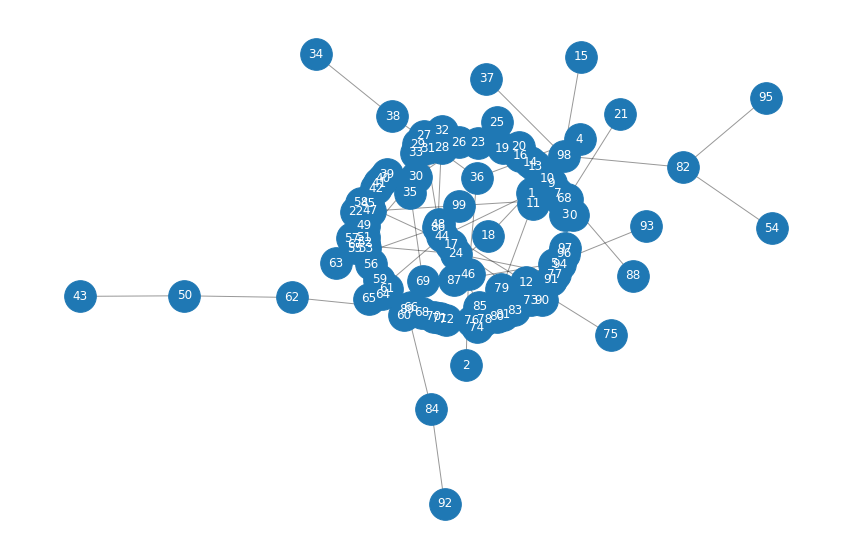

In [12]:
# gráfico GER

fig, ax = plt.subplots(1,1,figsize=(15,10))

# network
G = GER

# layout position
pos = nx.kamada_kawai_layout(G)

# draw edges
nx.draw_networkx_edges(G, 
                       pos=pos, 
                       alpha=0.4, 
                       ax=ax)

# draw nodes
nodes = nx.draw_networkx_nodes(G,
                               node_size=1000,
                               pos=pos, 
                               cmap=plt.cm.jet,
                               ax=ax)

# draw labels
nx.draw_networkx_labels(G, 
                        pos=pos, 
                        font_color='white', 
                        ax=ax)

plt.axis("off")
plt.show()

### Coeficiente de agrupamento local

- Considere um grafo $G = (V,E)$. 

- O coeficiente de agrupamento local permite avaliar o quanto os nós são capazes de proporcionar interação entre os seus vizinhos. 

- O coeficiente de agrupamento local($cal$) de um nó $i$ é dado por:

$$
cal(i)=\frac{\sum\limits_{j \in V \atop j \ne i} \sum\limits_{k \in V \atop k \ne i, \ k \ne j} \left( A(i,j) \cdot A(i,k) \cdot A(j,k) \right)}{\sum\limits_{j \in V : \atop j \ne i} \sum\limits_{k \in V : \atop k \ne i,k \ne j} \left( A(i,j) \cdot A(i,k) \right) }.
$$

- Vértices que possuem grau 0 ou 1 possuem coeficiente de agrupamento local nulo. 

- O coeficiente de agrupamento local médio($calm$) é definido por:

$$
calm(G)=\frac{1}{n}\sum\limits_{i \in V}^ncl(i).
$$
onde $n = |V|$.

O coeficiente de agrupamento total é dado pela proporção de vezes que dois vértices $j$ e $k$ que são vizinhos de um mesmo vértice $i$ também são vizinhos entre si
$$
cat(G)=\frac{\sum\limits_{i} \sum\limits_{j: \atop j \ne i} \sum\limits_{k: \atop k \ne i, k \ne j} A(i,j) \cdot A(i,k) \cdot A(j,k)}{\sum\limits_{i} \sum\limits_{j: \atop j \ne i} \sum\limits_{k: \atop k \ne i, k \ne j} A(i,j) \cdot A(i,k)}.
$$


### Funções do networkx

- **clustering()**: retorna o coeficiente de agrupamento local.

- **average_clustering()**: retorna o coeficiente de agrupamento médio.

- **transitivity()**: retorna o coeficiente de agrupamento total. 


In [13]:
adj_A = nx.to_scipy_sparse_array(GND).toarray()
print(f"adjacency : \n {adj_A}")

adjacency : 
 [[0 1 1 0 1 0]
 [1 0 1 1 1 1]
 [1 1 0 1 0 0]
 [0 1 1 0 0 0]
 [1 1 0 0 0 0]
 [0 1 0 0 0 0]]


In [14]:
# cat GND

cat = 0
somaf = 0
soman = 0
somad = 0
for i in GND:
    for j in GND:
        for k in GND:
            if ((i!=j) and (i!=k) and (j!=k)):
                aij = adj_A[i,j]
                aik = adj_A[i,k]
                ajk = adj_A[j,k]
                soman += (aij*aik*ajk)
                somad += (aij*aik)
somaf = soman/somad
cat = somaf

print(f"cat do GND = {cat}")

cat do GND = 0.5


In [15]:
grau_node = dict(nx.degree(GND))

cal = {}
for i in GND:
    if ((grau_node[i] == 0) | (grau_node[i] == 1)):
        cal[i] = 0
        continue

    somaf = 0
    soman = 0
    somad = 0
    for j in GND:
        for k in GND:
            if ((i!=j) and (i!=k) and (j!=k)):
                aij = adj_A[i,j]
                aik = adj_A[i,k]
                ajk = adj_A[j,k]
                soman += (aij*aik*ajk)
                somad += (aij*aik)
    somaf = soman/somad
    cal[i] = somaf

print(f"cal do GND")
for k, val in cal.items():
    print(f"node {k}: {val}")

cal do GND
node 0: 0.6666666666666666
node 1: 0.3
node 2: 0.6666666666666666
node 3: 1.0
node 4: 1.0
node 5: 0


In [16]:
calm = 0
n = nx.number_of_nodes(GND)
for i in GND:
    calm += cal[i]
calm = calm/n
print(f"calm do GND = {calm}")

calm do GND = 0.6055555555555555


In [17]:
# cat usand network

# network
G = GND

cat = nx.transitivity(G)

print(f"cat GND = {cat}")

cat GND = 0.5


In [18]:
# cal do GND usando network

# network
G = GND

cal = nx.clustering(G)

print(f"cal do GND")
for k, val in cal.items():
    print(f"node {k}: {val}")

cal do GND
node 0: 0.6666666666666666
node 1: 0.3
node 2: 0.6666666666666666
node 3: 1.0
node 4: 1.0
node 5: 0


In [19]:
# calm usando networkx

# network
G = GND

calm = nx.average_clustering(G)

print(f"calm do GND = {calm}")

calm do GND = 0.6055555555555555


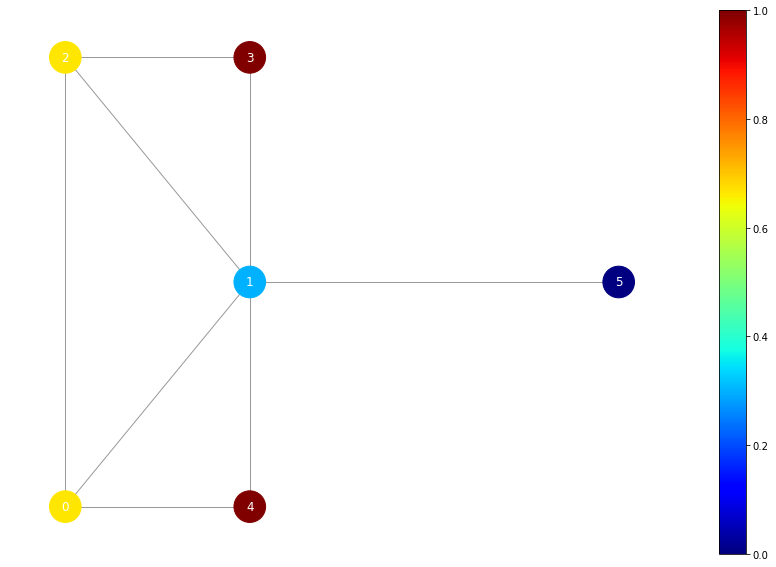

In [20]:
# grafic com cal para GND

G = GND

cal = nx.clustering(G)
cal = list(cal.values())

fig, ax = plt.subplots(1,1,figsize=(15,10))

# layout position
#pos = nx.kamada_kawai_layout(G)
pos = {}
pos[0] = [-1,-1]
pos[1] = [0,0]
pos[2] = [-1,1]
pos[3] = [0,1]
pos[4] = [0,-1]
pos[5] = [2,0]


# color of nodes
color = cal

# draw edges
nx.draw_networkx_edges(G, 
                       pos=pos, 
                       alpha=0.4, 
                       ax=ax)

# draw nodes
nodes = nx.draw_networkx_nodes(G, 
                               pos=pos, 
                               node_size=1000,
                               node_color=color,
                               cmap=plt.cm.jet,
                               ax=ax)

# draw labels
nx.draw_networkx_labels(G, 
                        pos=pos,
                        font_color='white', 
                        ax=ax)

plt.axis("off")
plt.colorbar(nodes)
plt.show()

In [21]:
# cal para KCG

# network
G = KCG

cal = nx.clustering(G)

print(f"cal do GND")
for k, val in cal.items():
    print(f"node {k}: {val}")

cal do GND
node 0: 0.15
node 1: 0.3333333333333333
node 2: 0.24444444444444444
node 3: 0.6666666666666666
node 4: 0.6666666666666666
node 5: 0.5
node 6: 0.5
node 7: 1.0
node 8: 0.5
node 9: 0
node 10: 0.6666666666666666
node 11: 0
node 12: 1.0
node 13: 0.6
node 14: 1.0
node 15: 1.0
node 16: 1.0
node 17: 1.0
node 18: 1.0
node 19: 0.3333333333333333
node 20: 1.0
node 21: 1.0
node 22: 1.0
node 23: 0.4
node 24: 0.3333333333333333
node 25: 0.3333333333333333
node 26: 1.0
node 27: 0.16666666666666666
node 28: 0.3333333333333333
node 29: 0.6666666666666666
node 30: 0.5
node 31: 0.2
node 32: 0.19696969696969696
node 33: 0.11029411764705882


In [22]:
# calm do KCG

# network
G = KCG

calm = nx.average_clustering(G)

print(f"calm do KCG = {calm}")

calm do KCG = 0.5706384782076823


In [23]:
# cat do KCG

# network
G = KCG

cat = nx.transitivity(G)

print(f"cat do GND = {cat}")

cat do GND = 0.2556818181818182


In [24]:
# conjuntos associados ao coeficiente de agrupamento local

# network
G = KCG

cal = nx.clustering(G)

set_cal = set(cal.values())
print(set_cal)

for i in set_cal:
    tmp = []
    for key, value in cal.items():
        if i == cal[key]:
            tmp.append(key)
    print(i, "=", set(tmp))

{0.15, 0.6666666666666666, 0.3333333333333333, 0.5, 0.24444444444444444, 1.0, 0, 0.6, 0.4, 0.16666666666666666, 0.19696969696969696, 0.2, 0.11029411764705882}
0.15 = {0}
0.6666666666666666 = {10, 3, 4, 29}
0.3333333333333333 = {1, 19, 24, 25, 28}
0.5 = {8, 5, 6, 30}
0.24444444444444444 = {2}
1.0 = {7, 12, 14, 15, 16, 17, 18, 20, 21, 22, 26}
0 = {9, 11}
0.6 = {13}
0.4 = {23}
0.16666666666666666 = {27}
0.19696969696969696 = {32}
0.2 = {31}
0.11029411764705882 = {33}


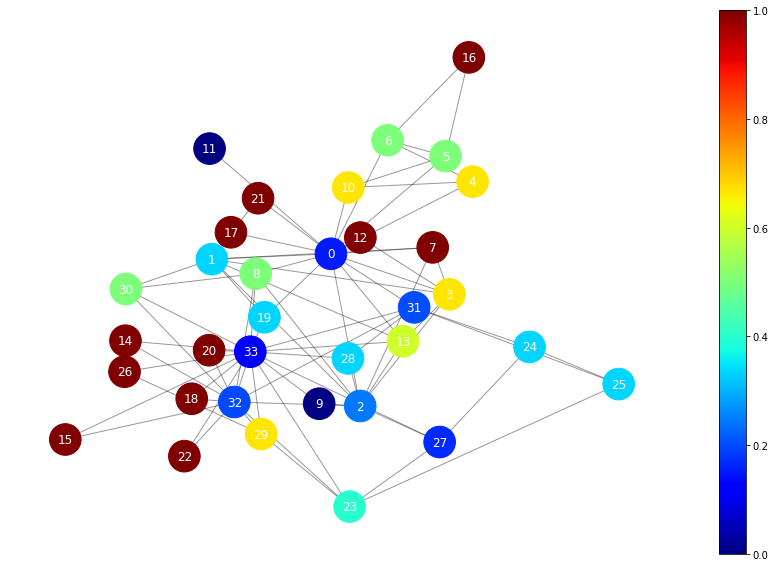

In [25]:
# network karate club graph

G = KCG

cal = list(cal.values())

fig, ax = plt.subplots(1,1,figsize=(15,10))

# layout position
pos = nx.kamada_kawai_layout(G)

# color of nodes
color = cal

# draw edges
nx.draw_networkx_edges(G, 
                       pos=pos, 
                       alpha=0.4, 
                       ax=ax)

# draw nodes
nodes = nx.draw_networkx_nodes(G, 
                               pos=pos, 
                               node_size=1000,
                               node_color=color,
                               cmap=plt.cm.jet,
                               ax=ax)

# draw labels
nx.draw_networkx_labels(G, 
                        pos=pos,
                        font_color='white', 
                        ax=ax)

plt.axis("off")
plt.colorbar(nodes)
plt.show()

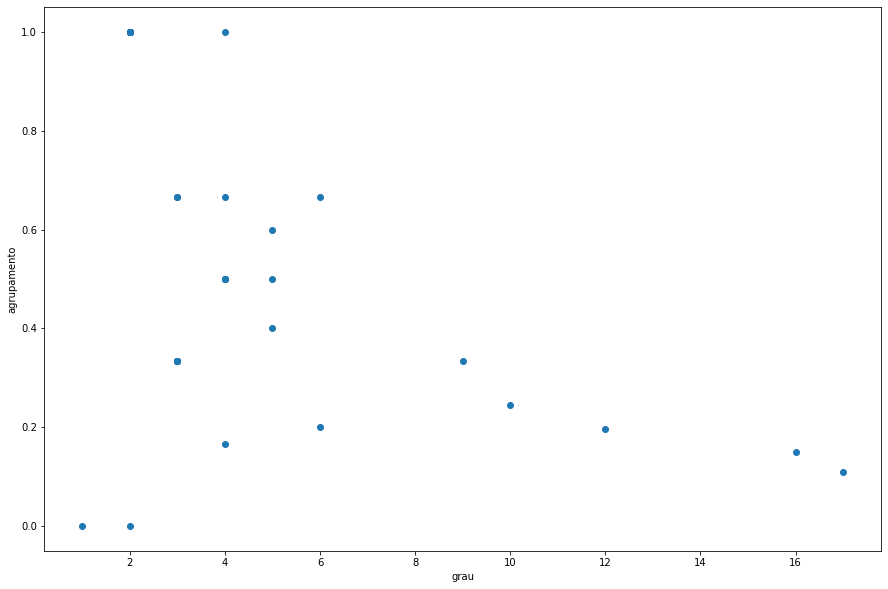

In [27]:
# network

G = KCG

grau_node = dict(nx.degree(G)).values()
cal = list(nx.clustering(G).values())

plt.figure(figsize=(15,10))
plt.plot (grau_node ,cal ,'o')
plt.xlabel('grau')
plt.ylabel('agrupamento')

plt.show()

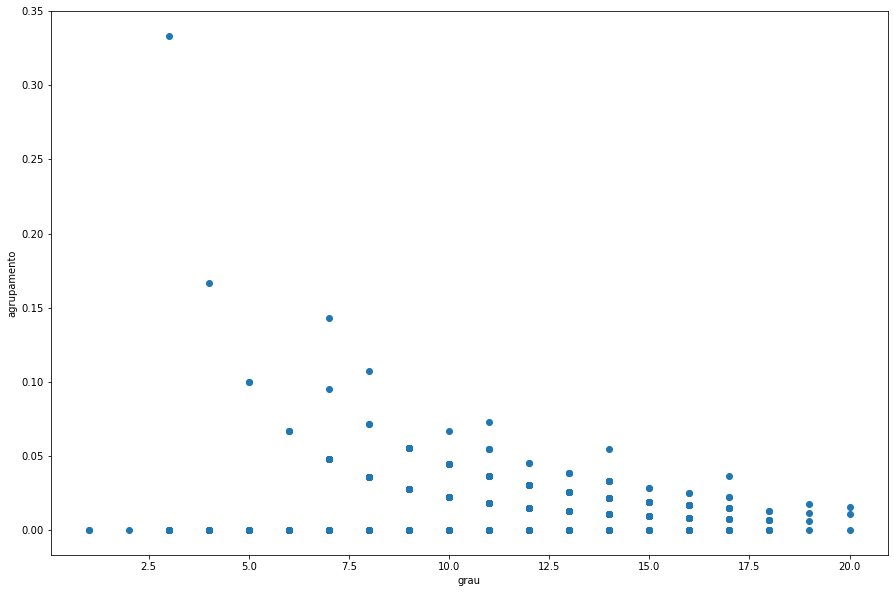

In [28]:
# network

G = nx.gnp_random_graph(1000,0.01)

grau_node = dict(nx.degree(G)).values()
cal = list(nx.clustering(G).values())

plt.figure(figsize=(15,10))
plt.plot (grau_node ,cal ,'o')
plt.xlabel('grau')
plt.ylabel('agrupamento')

plt.show()

### Homofilia

- Homofilia ou assortatividadesão são informações contidas em redes complexas que nos proporcionam saber se nós similares tendem a se ligarem entre si. 

- Considere um grafo $G=(V,E)$ e o particinamento de $V$ nos grupos $P = \{V^1,V^2,\ldots,V^a\}$ de acordo com atributos que esses nós possuam. 

- O índice $EI$, que pode ser calculado para qualquer $V' \subset V$, mede a homofilia através de 
    - uma razão que envolve a quantidade de ligações entre nós de grupos distintos($EL$) e 
    - a quantidade de ligações entre nós do mesmo grupo($IL$). 

- Considerando a partição $P$ temos uma função indicadora $\delta: V \times V \rightarrow \{0,1\}$ definida por
$$
\delta(i,j)=
\begin{cases}
1, & \text{se existe } k, \text{ tal que } i, j \in V^k,\\
0, & \text{caso contrário}.
\end{cases}
$$

- Seja $V'\subseteq V$, podemos encontrar o número de ligações internas e externas envolvendo os nós em $V'$, respectivamente, por

$$
IL(V') = \sum_{i \in V'} \sum_{j \notin V' \atop \text{ ou } j>i} \left( A(i,j) \cdot \delta(i,j) \right)
$$
e
$$
EL(V') = \sum_{i \in V'} \sum_{j \notin V' \atop \text{ ou } j>i} \left( A(i,j) \cdot (1-\delta(i,j)) \right)
$$

- Então a homofilia de $V'$ é dada por 
$$
EI(V')=\frac{EL(V')-IL(V')}{EL(V')+IL(V')}
$$

- O valor do índice EI varia no intervalo $[-1,1]$, em que um índice EI igual a -1 (resp., 1) indica um subconjunto de nós que só possui ligações internas (resp., externas).

### Exemplo
Considere o grafo $GND$

In [398]:
adj_A = nx.to_scipy_sparse_array(GND).toarray()
#print(f"adjacency do GND : \n {adj_A}")

In [399]:
# particao
P = {0: [0,4], 1 : [1,2,3,5]}

In [409]:
n = nx.number_of_nodes(GND)
delta = np.zeros((n, n))

for i in GND:
    for j in GND:
        if ((i in P[0]) and (j in P[0])):
            delta[i,j] = 1
        if ((i in P[1]) and (j in P[1])):
            delta[i,j] = 1


print(f"delta = \n {delta}")

delta = 
 [[1. 0. 0. 0. 1. 0.]
 [0. 1. 1. 1. 0. 1.]
 [0. 1. 1. 1. 0. 1.]
 [0. 1. 1. 1. 0. 1.]
 [1. 0. 0. 0. 1. 0.]
 [0. 1. 1. 1. 0. 1.]]


In [410]:
somaIL = 0
for i in GND:
    for j in GND:
        if j>i:
            somaIL += adj_A[i,j]*delta[i,j]

print(f"IL = {somaIL}")


somaEL = 0
for i in GND:
    for j in GND:
        if j>i:
            somaEL += adj_A[i,j]*(1 - delta[i,j])

print(f"EL = {somaEL}")


somaf = (somaEL-somaIL)/(somaEL+somaIL)
print(f"EI = {somaf}")

IL = 5.0
EL = 3.0
EI = -0.25


## Três tipos de assortatividade: 

- Os nós estão particionados em uma quantidade finita de grupos de atributos. 

- Os atributos dos nós são caracterizados por valores escalares, tais como idade, PIB, índice h, etc. 

- O atributo utilizado para avaliar a homofilia é a própria centralidade de grau dos nós.


### Assortatividade com atributos categóricos

- Considere um conjunto V de vértices de um grafo possa ser particionado em grupos $\{V^1, V^2, \ldots, V^a\}$.

- A fração de arestas que ligam um nó no conjunto $V^i$ a um nó no conjunto $V^j$:
$$
e_{ij} = \frac{\sum_{l \in V^i} \sum_{k \in V^j} A(l, k)}{\sum_{l \in V} \sum_{k \in V} A(l, k)},
$$

Observe que $\sum_{l \in V} \sum_{k \in V} A(l, k) = 2 \cdot m$, onde $m$ é o número de arestas da rede não direcionada.

Para uma rede não direcionada temos
$$
e_{ij} = \frac{1}{2 \cdot m} \left( \sum_{l \in V^i} \sum_{k \in V^j} A(l, k) \right)
$$ 
e para uma rede direcionada
$$
e_{ij} = \frac{1}{m} \sum_{l \in V^i} \left( \sum_{k \in V^j} A(l, k) \right)
$$ 

- A fração de arestas que iniciam(terminam) em vértices do conjunto $V^i$ é dada por $a_i = \sum_j e_{ij}$ ($b_i = \sum_j e_{ji}$).

-  Em redes não direcionadas, temos que $e_{ij}=e_{ji}$ e $a_i=b_i$. 

- O coeficiente de assortatividade é dado por:
$$
As^c(G) = \frac{\sum_{i=1}^a e_{ii} - \sum_{i=1}^{a} (a_i \cdot b_i)}{1 - \sum_{i=1}^{a} (a_i \cdot b_i)},
$$
onde a normalização no denominador garante que no caso de todas as arestas ligarem nós do mesmo grupo, homofilia perfeita, o coeficiente de assortatividade tenha valor igual a 1.

In [411]:
adj_A = nx.to_scipy_sparse_array(GND).toarray()
#print(f"adjacency : \n {adj_A}")

P = {0:[0,4], 1:[1,2,3,5] }

n = nx.number_of_nodes(GND)
m = nx.number_of_edges(GND)
#print(f"m = {m}")

eij = np.zeros((n, n))

#somad = 0
#for l in GND:
#    for k in GND:
#        somad += adj_A[l,k]
#print(f"2*m = {somad}")

PK = list(P.keys())

for i in PK:
    for j in PK:
        soman = 0
        #somad = 0
        for l in P[i]:
            for k in P[j]:
                soman += adj_A[l,k]
        eij[i,j] = soman/(2*m)
        print(f"e[{i},{j}] = {eij[i,j]}")


e[0,0] = 0.125
e[0,1] = 0.1875
e[1,0] = 0.1875
e[1,1] = 0.5


In [413]:
a = np.zeros(2)
b = np.zeros(2)

for i in PK:
    soma = 0
    for j in [0,1]:
        soma += eij[i,j]
    a[i] = soma

for i in PK:
    soma = 0
    for j in [0,1]:
        soma += eij[j,i]
    b[i] = soma

print(f"a = {a}")
print(f"b = {b}")

a = [0.3125 0.6875]
b = [0.3125 0.6875]


In [415]:
cac = 0

soma0 = 0
for i in [0,1]:
    soma0 += eij[i,i]

soma1 = 0
for i in [0,1]:
    soma1 += a[i]*b[i]

soman = soma0-soma1
somad = 1 - soma1

cac = soman/somad
print(f"cac do GND = {cac}")


cac do GND = 0.12727272727272726


### Assortatividade com atributos numéricos

- Seja $x_i$ o atributo escalar do no $i$, como o nó $i$ possui grau $d_i$, o valor médio dos atributos escalares ao longo das arestas é dado por:
$$
\overline{x} = \frac{\sum_{i \in V} d_i \cdot x_i}{\sum_{i \in V} d_i} = \frac{1}{2m} \sum_{i \in V} d_i \cdot x_i.
$$

- O coeficiente de assortatividade numérico é:
$$
\begin{align} \notag
As^e(G) & = 
\frac{\frac{1}{2m} \left( \sum_{(i,j)} \left( A(i,j) \cdot x_i \cdot x_j \right) \right) -  \overline{x}^2}{ \frac{1}{2m} \left( \sum_{(i,j)} \left( A(i,j) \cdot x_i^2 \right) \right) - \overline{x}^2} \\
\end{align}
$$

### Assortatividade de grau

- Um caso especial de assortatividade com atributo numérico que é bastante utilizado é quando o atributo é a própria centralidade de grau, ou seja, $x_i = d_i$.

- Esta assortatividade mede se na rede existe uma tendência de nós muito conectados estarem conectados entre si e nós pouco conectados estarem ligados entre si.

- Seja $d_i$ o grau do nó $i \in V$, o valor médio dos atributos de grau ao longo das arestas é dado por:
$$
\overline{x} = \frac{\sum_{i \in V} (d_i \cdot d_i)}{\sum_{i \in V} d_i} = \frac{1}{2m} \left( \sum_{i \in V} d_i \cdot d_i \right).
$$

- O coeficiente de assortatividade de grau é:
$$
As^g(G) = 
\frac{\frac{1}{2m} \left( \sum_{(i,j)} \left( A(i,j) \cdot d_i \cdot d_j \right) \right) - \overline{x}^2}{ \frac{1}{2m} \left( \sum_{(i,j)} \left( A(i,j) \cdot d_i^2 \right) \right) - \overline{x}^2}
$$

In [416]:
adj_A = nx.to_scipy_sparse_array(GND).toarray()
#print(f"adjacency : \n {adj_A}")

P = {0:[0,4], 1:[1,2,3,5] }

n = nx.number_of_nodes(GND)
m = nx.number_of_edges(GND)
#print(f"m = {m}")

dic_grau = dict(nx.degree(GND))
#val_grau = list(dic_grau.values())

sgrau2 = 0
for i in GND:
    sgrau2 += dic_grau[i]*dic_grau[i]
#print(sgrau2)
media = sgrau2/(2*m)

print(f"valor médio dos atributos numéricos = {media}")

valor médio dos atributos numéricos = 3.25


In [417]:
soma = 0 
for i in GND:
    for j in GND:
        soma += adj_A[i,j]*dic_grau[i]*dic_grau[j]
soma = soma/(2*m)
soman = soma - media*media
#print(soman)

soma = 0 
for i in GND:
    for j in GND:
        soma += adj_A[i,j]*dic_grau[i]*dic_grau[i]
soma = soma/(2*m)
somad = soma - media*media
#print(soma)

cag = soman/somad
print(f"cag do GND = {cag}")

cag do GND = -0.6296296296296297


### Funções do networkx

- **attribute_assortativity_coefficient**: retorna a assortatividade relacionada com atributos categóricos.

- **numeric_assortativity_coefficient()**: retorna a assortatividade relacionada com atributos numéricos. 

- **degree_assortativity_coefficient()**: retorna a assortatividade para o atributo de grau. 

### Exemplo
Considere o exemplo do estudo das redes sociais dos personagens dos primeiros seis livros da saga Harry Potter.

In [418]:
def carregarlivro(livro):
    atri = pd.read_csv('../../data/harrypotter/hpattributes.txt', sep='\t')
    livros = pd.read_csv('../../data/harrypotter/hpbook{:1d}.txt'.format(livro), sep=' ', header=None)
    nome = pd.read_csv('../../data/harrypotter/hpnames.txt', sep='\t')

    PG = nx.DiGraph ()
    
    n = atri.shape[0]

    for k in range(n):
        PG.add_node(
            k,
            nome = nome['name'][k], 
            ano = atri['schoolyear'][k], 
            gen = atri['gender'][k], 
            casa = atri['house'][k])
    
    # Construímos a rede
    for k in range(n):
        for m in range(n) :
            if livros.values[k][m] == 1:
                PG.add_edge(k,m)

    gen_ = nx.attribute_assortativity_coefficient(PG, "gen")
    casa_ = nx.attribute_assortativity_coefficient(PG, "casa")
    ano_ = nx.numeric_assortativity_coefficient(PG.to_undirected(), "ano")
    grau_ = nx.degree_assortativity_coefficient(PG.to_undirected(), "grau")

    return gen_, casa_, ano_, grau_

In [419]:
livros = list(range(1,7))

n = len(livros)
gen_ = np.zeros(n)
casa_ = np.zeros(n)
ano_ = np.zeros(n)
grau_ = np.zeros(n)

for k in range(n):
    print(f"livro {k}",end=": ")
    gen_[k], casa_[k], ano_[k], grau_[k] = carregarlivro(livros[k])
    print(f"gen={round(gen_[k],4)}; casa={round(casa_[k],4)}; ano={round(ano_[k],4)}; grau={round(grau_[k],4)}")

livro 0: gen=0.1282; casa=1.0; ano=0.5016; grau=0.1757
livro 1: gen=0.2041; casa=0.7185; ano=0.2511; grau=-0.1113
livro 2: gen=0.1109; casa=0.6623; ano=0.2509; grau=-0.0752
livro 3: gen=0.1833; casa=0.6615; ano=0.3281; grau=0.0276
livro 4: gen=0.0464; casa=0.5891; ano=0.4408; grau=-0.1309
livro 5: gen=0.3749; casa=0.6614; ano=0.7039; grau=0.0757


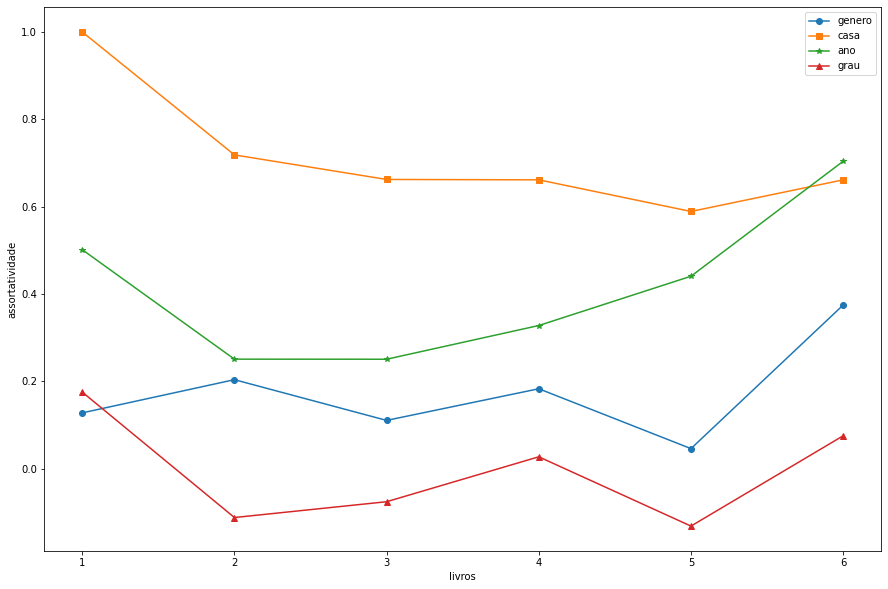

In [420]:
fig = plt.subplots(1,1,figsize=(15,10))

plt.plot(livros, gen_, '-o', label = 'genero')
plt.plot(livros, casa_, '-s', label = 'casa')
plt.plot(livros, ano_, '-*', label = 'ano')
plt.plot(livros, grau_, '-^', label = 'grau')
plt.legend()

plt.xlabel('livros')
plt.ylabel('assortatividade')
plt.show()

### Exemplo
Considere o ***"data sets correspond to the contacts and friendship relations between students in a high school in Marseilles, France, in December 2013"***.

In [421]:
## High school in Marseille
# schoolfriends_vertices.csv and schoolfriends_edgelist.csv data sets 
# This data set represents friendships reported between schoolchildren in a high school in Marseille, France in 2013. 
# The vertex set provides the ID, class and gender of each child, and the edgelist has two types of relationships. 
# The first type is a reported friendship where the from ID reported the to ID as a friend. 
# The second type is a known Facebook friendship between the two IDs
# http://www.sociopatterns.org/datasets/high-school-contact-and-friendship-networks/
# https://journals.plos.org/plosone/article?id=10.1371/journal.pone.0136497

schoolfriends_edgelist = pd.read_csv("../../data/schoolfriends/schoolfriends_edgelist.csv")
schoolfriends_vertices = pd.read_csv("../../data/schoolfriends/schoolfriends_vertices.csv")

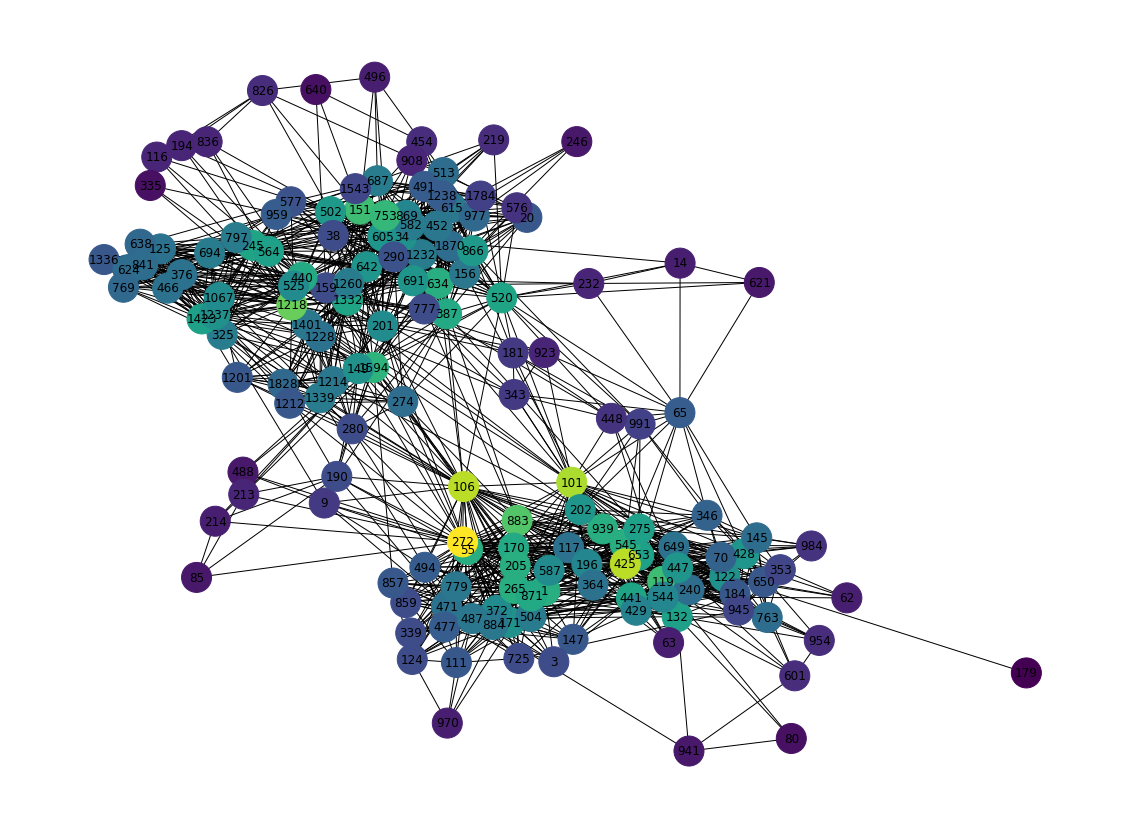

In [422]:
# High school in Marseille: undirected facebook graph

schoolfriends_fb = nx.from_pandas_edgelist(
  df = schoolfriends_edgelist[schoolfriends_edgelist.type == 'facebook'],
  source = "from",
  target = "to"
)

pos = nx.spring_layout(schoolfriends_fb)
#betCent = nx.betweenness_centrality(schoolfriends_fb, normalized=True, endpoints=True)
degCent = dict(nx.degree(schoolfriends_fb))
node_color = [20000.0 * schoolfriends_fb.degree(v) for v in schoolfriends_fb]
#node_size =  [v * 10000 for v in betCent.values()]
#node_size =  [v * 100 for v in degCent.values()]

plt.figure(figsize=(20,15))


dic_grau = dict(nx.degree(schoolfriends_fb))
val_grau = dic_grau.values()
color = list(dic_grau.values())

nx.draw_networkx(schoolfriends_fb, 
                 pos=pos, 
                 #with_labels=False,
                 node_color=node_color,
                 #node_color=color,
                 node_size=900 
                 )

plt.axis('off')
#plt.colorbar(color)
plt.show()

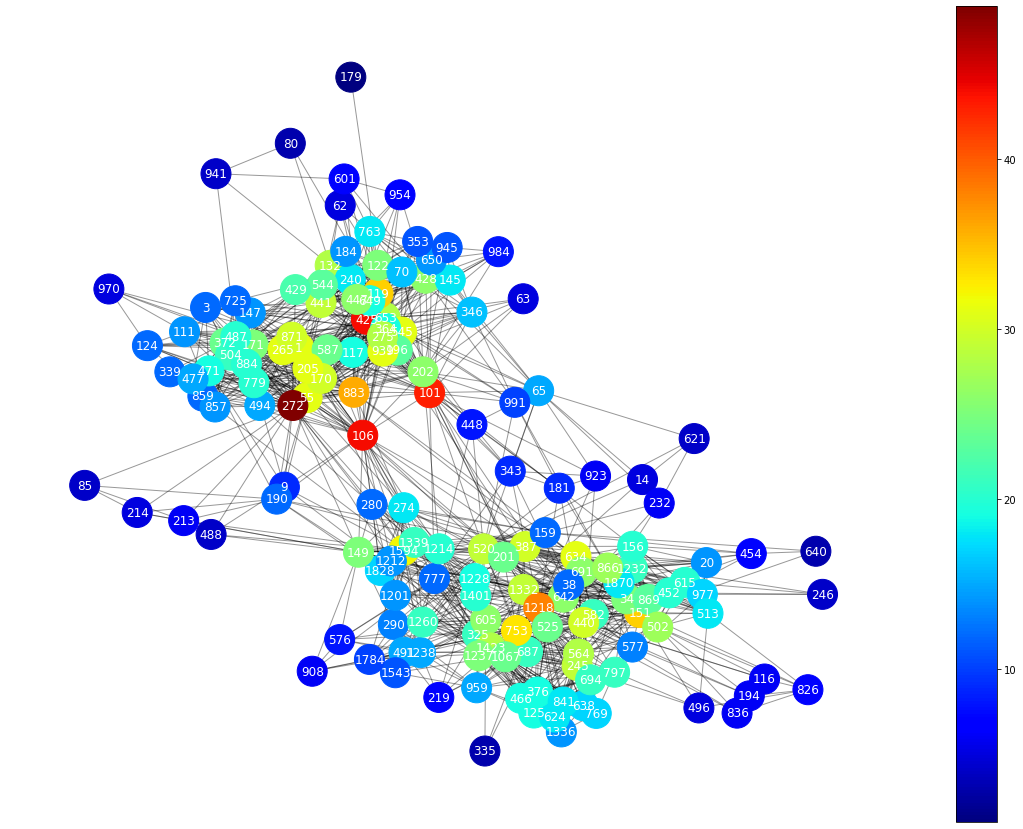

In [423]:
# grafico com graus

fig, ax = plt.subplots(1,1,figsize=(20,15))

G = schoolfriends_fb

# layout position
#pos = nx.kamada_kawai_layout(G)
pos = nx.spring_layout(G)

# define a cor do nos
color = list(dic_grau.values())

# draw edges
nx.draw_networkx_edges(G, 
                       pos=pos, 
                       alpha=0.4, 
                       ax=ax)

# draw nodes
nodes = nx.draw_networkx_nodes(G,
                               node_size=900,
                               pos=pos,
                               node_color=color,
                               cmap=plt.cm.jet,
                               ax=ax)

# draw labels
nx.draw_networkx_labels(G, 
                        pos=pos, 
                        font_color='white', 
                        ax=ax)

plt.axis("off")
plt.colorbar(nodes)
plt.show()

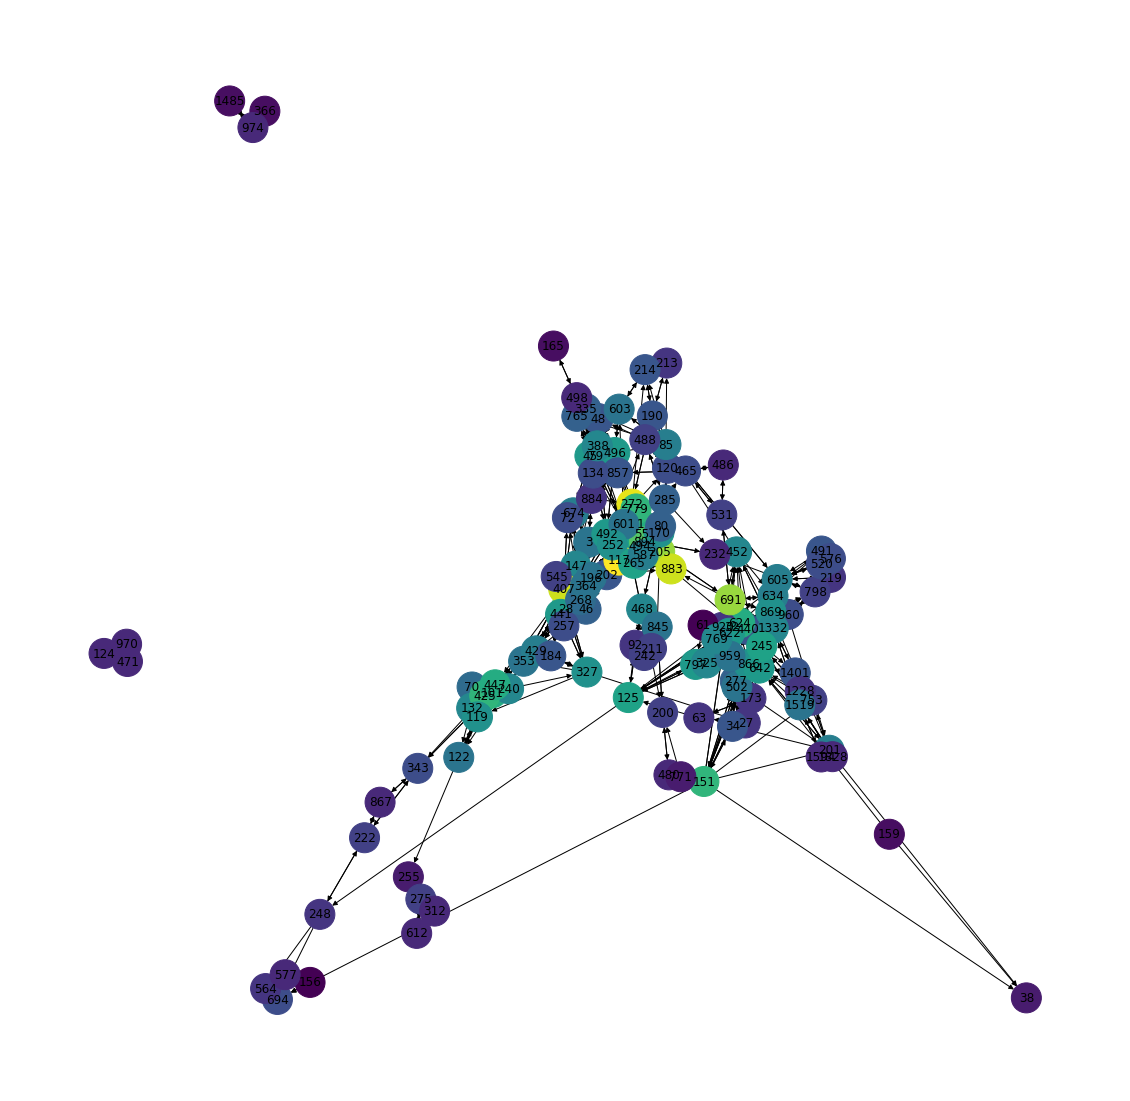

In [424]:
# High school in Marseille: directed reported graph

schoolfriends_rp = nx.from_pandas_edgelist(
  df = schoolfriends_edgelist[schoolfriends_edgelist.type == 'reported'],
  source = "from",
  target = "to",
  create_using=nx.DiGraph()
)

pos = nx.spring_layout(schoolfriends_rp)
#betCent = nx.betweenness_centrality(schoolfriends_rp, normalized=True, endpoints=True)
node_color = [20000.0 * schoolfriends_rp.degree(v) for v in schoolfriends_rp]
#node_size =  [v * 10000 for v in betCent.values()]

# color of nodes
color = nx.degree(schoolfriends_fb)

plt.figure(figsize=(20,20))

nx.draw_networkx(schoolfriends_rp, 
                 pos=pos, 
                 #with_labels=False,
                 node_color=node_color,
                 node_size=900 #node_size 
                 )

plt.axis('off')

plt.show()

In [425]:
# add class vertex attribute to both graphs

class_attr = dict(zip(schoolfriends_vertices['id'], schoolfriends_vertices['class']))
gender_attr = dict(zip(schoolfriends_vertices['id'], schoolfriends_vertices['gender']))

nx.set_node_attributes(schoolfriends_fb, name = "class", values = class_attr)
nx.set_node_attributes(schoolfriends_fb, name = "gender", values = gender_attr)

In [426]:
gender_attr

{650: 'F',
 498: 'F',
 627: 'F',
 857: 'F',
 487: 'F',
 28: 'M',
 927: 'F',
 72: 'F',
 400: 'F',
 945: 'F',
 637: 'F',
 443: 'F',
 177: 'F',
 984: 'F',
 954: 'F',
 859: 'M',
 489: 'F',
 991: 'M',
 62: 'F',
 428: 'M',
 145: 'F',
 471: 'F',
 65: 'M',
 809: 'F',
 681: 'F',
 970: 'F',
 854: 'F',
 486: 'F',
 531: 'F',
 725: 'M',
 527: 'M',
 465: 'F',
 674: 'F',
 677: 'M',
 475: 'M',
 124: 'F',
 111: 'F',
 478: 'F',
 226: 'F',
 160: 'F',
 372: 'M',
 464: 'F',
 763: 'F',
 886: 'F',
 544: 'M',
 63: 'F',
 720: 'F',
 3: 'M',
 407: 'M',
 171: 'M',
 46: 'F',
 165: 'F',
 441: 'F',
 257: 'F',
 239: 'F',
 27: 'M',
 173: 'F',
 477: 'M',
 312: 'F',
 612: 'F',
 339: 'F',
 884: 'F',
 61: 'F',
 147: 'M',
 327: 'M',
 353: 'M',
 504: 'F',
 429: 'M',
 268: 'F',
 184: 'M',
 295: 'F',
 1: 'M',
 265: 'F',
 39: 'F',
 494: 'M',
 106: 'F',
 272: 'F',
 55: 'F',
 779: 'F',
 170: 'F',
 447: 'F',
 119: 'F',
 425: 'F',
 545: 'F',
 202: 'F',
 255: 'F',
 275: 'F',
 653: 'M',
 252: 'F',
 199: 'F',
 626: 'F',
 649: 'F',
 3

In [427]:
class_attr

{650: '2BIO1',
 498: '2BIO1',
 627: '2BIO1',
 857: '2BIO1',
 487: '2BIO1',
 28: '2BIO2',
 927: '2BIO1',
 72: '2BIO1',
 400: '2BIO1',
 945: '2BIO1',
 637: '2BIO1',
 443: '2BIO1',
 177: '2BIO1',
 984: '2BIO1',
 954: '2BIO1',
 859: '2BIO1',
 489: '2BIO1',
 991: '2BIO1',
 62: '2BIO1',
 428: '2BIO1',
 145: '2BIO1',
 471: '2BIO1',
 65: '2BIO1',
 809: '2BIO1',
 681: '2BIO1',
 970: '2BIO1',
 854: '2BIO1',
 486: '2BIO1',
 531: '2BIO1',
 725: '2BIO1',
 527: '2BIO1',
 465: '2BIO1',
 674: '2BIO1',
 677: '2BIO1',
 475: '2BIO1',
 124: '2BIO1',
 111: '2BIO1',
 478: '2BIO2',
 226: '2BIO2',
 160: '2BIO2',
 372: '2BIO2',
 464: '2BIO2',
 763: '2BIO2',
 886: '2BIO2',
 544: '2BIO2',
 63: '2BIO3',
 720: '2BIO2',
 3: '2BIO2',
 407: '2BIO2',
 171: '2BIO2',
 46: '2BIO2',
 165: '2BIO2',
 441: '2BIO2',
 257: '2BIO2',
 239: '2BIO2',
 27: '2BIO2',
 173: '2BIO2',
 477: '2BIO2',
 312: '2BIO2',
 612: '2BIO2',
 339: '2BIO2',
 884: '2BIO2',
 61: '2BIO2',
 147: '2BIO2',
 327: '2BIO2',
 353: '2BIO2',
 504: '2BIO2',
 429:

In [428]:
nx.attribute_assortativity_coefficient(schoolfriends_fb, "class")

0.3833666875368265

In [429]:
nx.degree_assortativity_coefficient(schoolfriends_fb)

0.02462443563586026

In [430]:
nx.attribute_assortativity_coefficient(schoolfriends_fb, "gender")

0.12830844580604214